# Import Libraries

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [228]:
data = pd.read_csv("data/shopping_trends_updated.csv")

# Preview data
print(data.head())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ

# Basic Data Cleaning

In [230]:
# Check for missing values
#print(data.isnull().sum())

# Drop or fill missing values
data = data.dropna(subset=['Customer ID', 'Payment Method'])

# Rename the column 'Purchase Amount (USD)' to 'Purchase_Amount' and replace spaces with underscores
data.columns = data.columns.str.replace('Purchase Amount (USD)', 'Purchase_Amount')
data.columns = data.columns.str.replace(' ', '_')

#print(data.info())

In [232]:
# removing cash as its not an online payment method
data = data[data["Payment_Method"] != "Cash"]
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 3230 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             3230 non-null   int64  
 1   Age                     3230 non-null   int64  
 2   Gender                  3230 non-null   object 
 3   Item_Purchased          3230 non-null   object 
 4   Category                3230 non-null   object 
 5   Purchase_Amount         3230 non-null   int64  
 6   Location                3230 non-null   object 
 7   Size                    3230 non-null   object 
 8   Color                   3230 non-null   object 
 9   Season                  3230 non-null   object 
 10  Review_Rating           3230 non-null   float64
 11  Subscription_Status     3230 non-null   object 
 12  Shipping_Type           3230 non-null   object 
 13  Discount_Applied        3230 non-null   object 
 14  Promo_Code_Used         3230 non-null   objec

In [234]:
def group_shipping(shipping):
    if shipping in ["Standard", "Store Pickup", "2-Day Shipping"]:
        return "Standard"
    else:
        return "Express"

In [236]:
data["shipping_group"] = data["Shipping_Type"].apply(group_shipping)
print(data["shipping_group"])
data["shipping_group"].value_counts()

0        Express
2        Express
3        Express
4        Express
5       Standard
          ...   
3895    Standard
3896    Standard
3897    Standard
3898     Express
3899    Standard
Name: shipping_group, Length: 3230, dtype: object


shipping_group
Express     1636
Standard    1594
Name: count, dtype: int64

In [238]:
#print(data.head())

# Descriptive Statistics

In [240]:
# Count of transactions by payment method
payment_counts = data['Payment_Method'].value_counts()
print(payment_counts)

Payment_Method
PayPal           677
Credit Card      671
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64


In [242]:
# Percentage of PayPal transactions
paypal_pct = payment_counts['PayPal'] / payment_counts.sum() * 100
print(f"PayPal Transactions: {paypal_pct:.2f}%")

PayPal Transactions: 20.96%


# Visualize Payment Method Usage

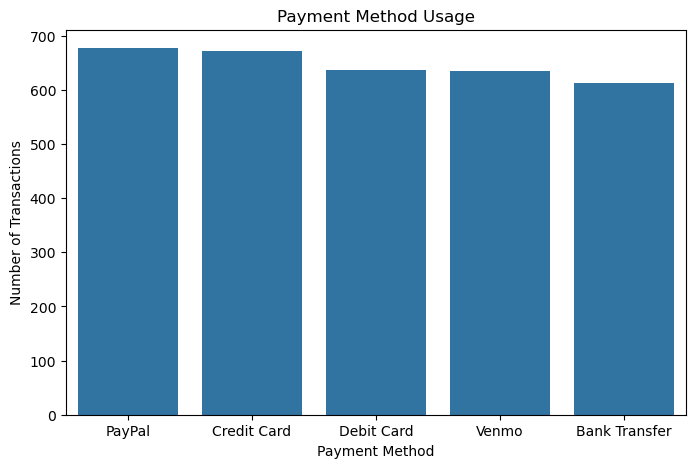

<Figure size 640x480 with 0 Axes>

In [244]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='Payment_Method', order=data['Payment_Method'].value_counts().index)
plt.title("Payment Method Usage")
plt.ylabel("Number of Transactions")
plt.xlabel("Payment Method")
plt.show()
plt.savefig('./images/paymentmethodusage.png')

# Seperate Paypal Customers for Analysis

In [246]:
paypal_df = data[data["Payment_Method"] == "PayPal"]
non_paypal_df = data[data["Payment_Method"] != "PayPal"]
payment_pp_counts = paypal_df['Payment_Method'].value_counts()
payment_npp_counts = non_paypal_df['Payment_Method'].value_counts()
print(payment_pp_counts)
print(payment_npp_counts)

Payment_Method
PayPal    677
Name: count, dtype: int64
Payment_Method
Credit Card      671
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64


# Age Distribution Shape (PayPal vs Others) KDE Histogram

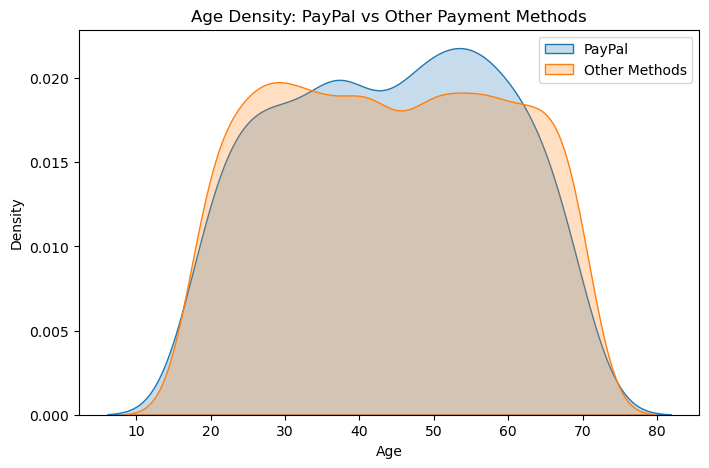

<Figure size 640x480 with 0 Axes>

In [250]:
plt.figure(figsize=(8,5))
sns.kdeplot(paypal_df["Age"], label="PayPal", fill=True)
sns.kdeplot(non_paypal_df["Age"], label="Other Methods", fill=True)
plt.title("Age Density: PayPal vs Other Payment Methods")
plt.legend()
plt.show()
plt.savefig('./images/age_density_histogram.png')

# Payment method preference by SEASON (HEAT MAP)

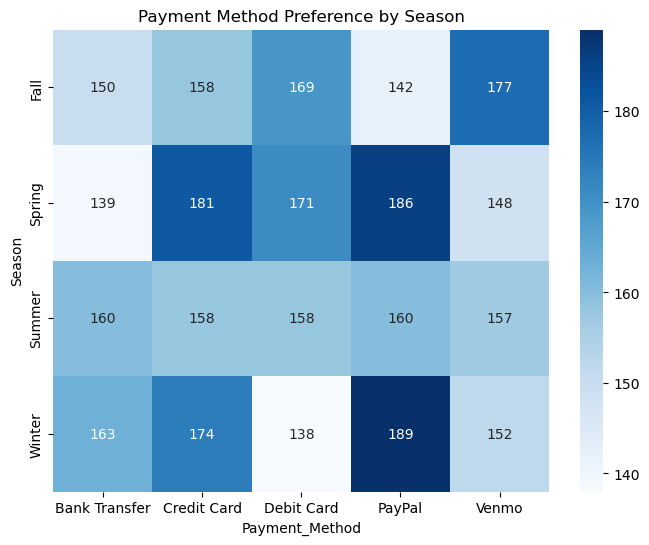

<Figure size 640x480 with 0 Axes>

In [252]:
season_payment = (
    data.groupby(["Season", "Payment_Method"])
      .size()
      .unstack()
)

plt.figure(figsize=(8,6))
sns.heatmap(season_payment, annot=True, fmt="d", cmap="Blues")
plt.title("Payment Method Preference by Season")
plt.show()
plt.savefig('./images/season_heatmap.png')

# Heat map based on shipping type

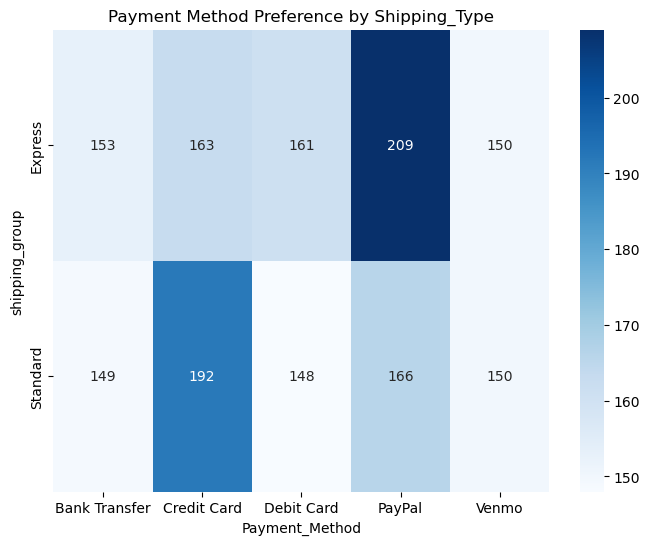

<Figure size 640x480 with 0 Axes>

In [260]:
item_payment = (
    winter_spring_df.groupby(["shipping_group", "Payment_Method"])
      .size()
      .unstack()
)

plt.figure(figsize=(8,6))
sns.heatmap(item_payment, annot=True, fmt="d", cmap="Blues")
plt.title("Payment Method Preference by Shipping_Type")
plt.show()
plt.savefig('./images/shippinggroup_heatmap.png')

In [262]:
express_winter_spring_df = winter_spring_df[winter_spring_df["shipping_group"] == "Express"]
payment_exp_season_counts = express_winter_spring_df['shipping_group'].value_counts()
print(payment_exp_season_counts)

shipping_group
Express    836
Name: count, dtype: int64


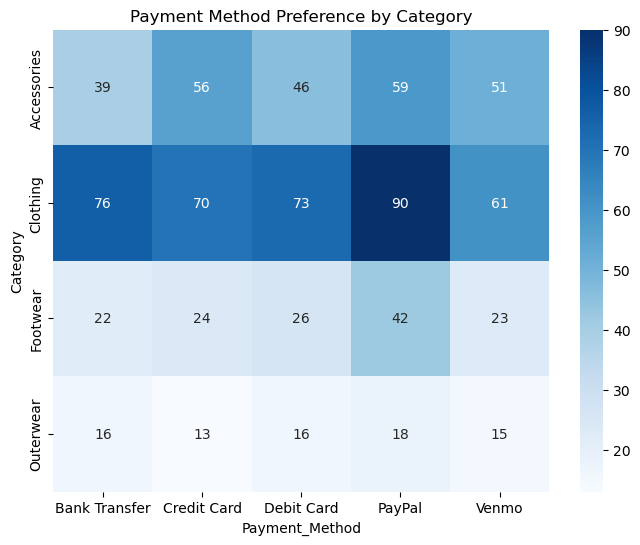

<Figure size 640x480 with 0 Axes>

In [268]:
item_payment = (
    express_winter_spring_df.groupby(["Category", "Payment_Method"])
      .size()
      .unstack()
)

plt.figure(figsize=(8,6))
sns.heatmap(item_payment, annot=True, fmt="d", cmap="Blues")
plt.title("Payment Method Preference by Category")
plt.show()
plt.savefig('./images/category_heatmap.png')

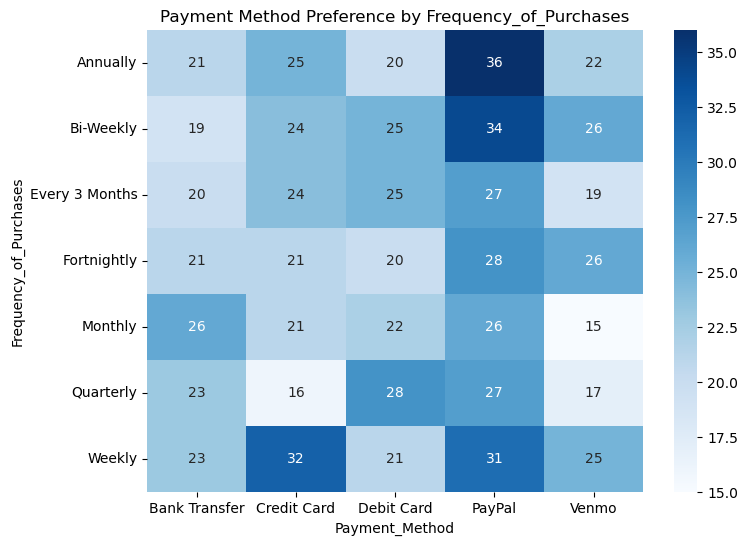

<Figure size 640x480 with 0 Axes>

In [270]:
item_payment = (
    express_winter_spring_df.groupby(["Frequency_of_Purchases", "Payment_Method"])
      .size()
      .unstack()
)

plt.figure(figsize=(8,6))
sns.heatmap(item_payment, annot=True, fmt="d", cmap="Blues")
plt.title("Payment Method Preference by Frequency_of_Purchases")
plt.show()
plt.savefig('./images/frequency_heatmap.png')